In [2]:
import pandas as pd
df = pd.read_csv('weight-height.csv')

In [3]:
df['Height'] = df['Height'] * 2.54
df['Weight'] = df['Weight'] * 0.453592
print(df.head(5))

  Gender      Height      Weight
0   Male  187.571423  109.720985
1   Male  174.706036   73.622732
2   Male  188.239668   96.497550
3   Male  182.196685   99.809504
4   Male  177.499761   93.598619


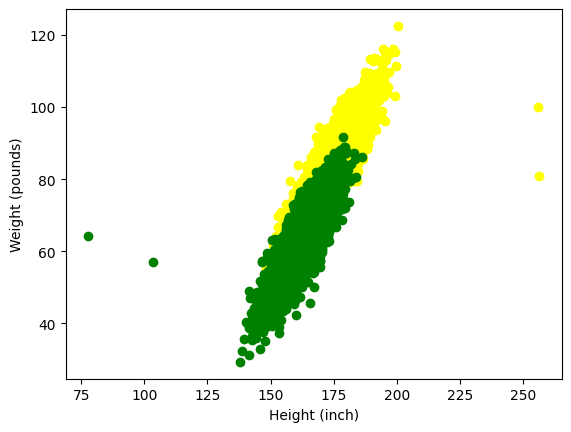

In [4]:
import matplotlib.pyplot as plt

x = df["Height"]
y = df["Weight"]
plt.scatter(x[df['Gender'] == "Male"], y[df['Gender']=="Male"], color='yellow')
plt.scatter(x[df['Gender'] == "Female"], y[df['Gender']=="Female"], color='green')
plt.xlabel("Height (inch)")
plt.ylabel("Weight (pounds)")
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x.values.reshape(-1,1), y)
w0 = reg.intercept_
w1 = reg.coef_
print(f'w0 = {w0}, w1 = {w1}')

w0 = -153.3518609678979, w1 = [1.34409474]


In [6]:
# Tính mean của các đặc trưng và nhãn
X_mean = x.mean()
y_mean = y.mean()

# Tính độ lệch giữa các điểm dữ liệu và giá trị trung bình
X_diff = x - X_mean
y_diff = y - y_mean

# Tính w1 (slope)
w1 = (X_diff * y_diff).sum() / (X_diff ** 2).sum()

# Tính w0 (intercept)
w0 = y_mean - w1 * X_mean

# In ra các hệ số hồi quy đã tìm được
print("w0 (intercept):", w0)
print("w1 (slope):", w1)

w0 (intercept): -153.35186096789772
w1 (slope): 1.3440947379390238


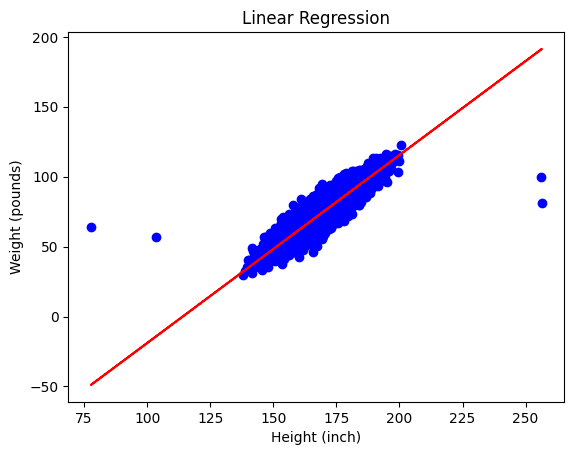

In [7]:
import matplotlib.pyplot as plt

plt.scatter(x, y, color='blue')
plt.plot(x, w0 + w1*x, color='red')
plt.xlabel('Height (inch)')
plt.ylabel('Weight (pounds)')
plt.title('Linear Regression')
plt.show()

In [8]:
import numpy as np

# Xác định đầu vào (features) và đầu ra (labels)
X = df[['Height']]  # Chiều cao là đầu vào

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

# Dự đoán giá trị cân nặng
y_pred = model.predict(X)

# Tính toán sai số cho từng điểm dữ liệu
errors = np.abs(y - y_pred)

# Sắp xếp sai số theo thứ tự giảm dần và lấy 10% điểm có sai số cao nhất
num_outliers = int(0.1 * len(errors))
outlier_indices = errors.argsort()[-num_outliers:][::-1]

# In ra giá trị sai số của 10% điểm dữ liệu có sai số cao nhất
print("Top 10% errors:")
print(errors[outlier_indices])

Top 10% errors:
7533    113.062107
2862    110.347752
67       90.563382
7675     71.152786
7821     23.651239
           ...    
8301      9.100594
4791      9.098483
6135      9.097317
9140      9.097268
7665      9.095738
Name: Weight, Length: 1000, dtype: float64


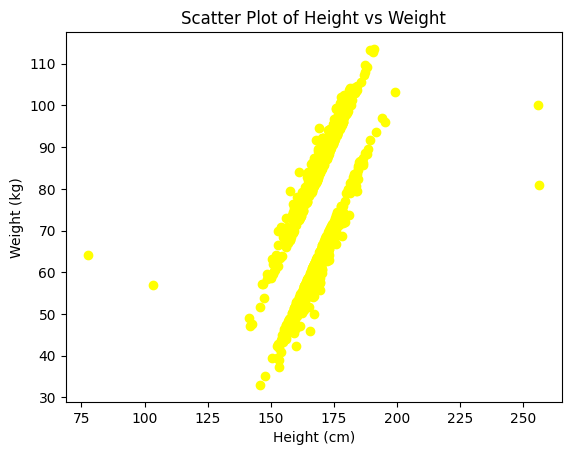

In [9]:
plt.scatter(X.iloc[outlier_indices], y.iloc[outlier_indices], color='yellow', label='Outliers')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Scatter Plot of Height vs Weight')
plt.show()